# RANDOM FOREST CLASSIFIER

# Import Modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import learning_curve

# Read The Data

Print out the first 5 rows of the data

In [0]:
data = pd.read_csv('final_loan.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,clientId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStauts,clientState,clientTimeAtEmployer,...,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,repaidDate,settleDays,firstPaymentRatio,firstPaymentDefault,loanDefault
0,755398623,52500.0,False,29,FEMALE,Single,business,Rented,KANO,7,...,16000,20.0,60,1,1,2018-08-01 11:30:31 UTC,-12,0.0,0,0
1,915689736,52500.0,False,25,MALE,Single,business,Rented,LAGOS,21,...,14500,15.0,60,0,1,2018-09-06 17:34:55 UTC,-15,0.0,0,0
2,292629156,35000.0,False,32,MALE,Single,education,Rented,ANAMBRA,29,...,19500,15.0,60,0,1,2018-11-27 01:33:56 UTC,64,0.0,1,1
3,671710636,35000.0,False,28,FEMALE,Married,business,Own Residence,OSUN,36+,...,19500,15.0,60,1,1,2018-07-09 18:48:44 UTC,-10,0.0,0,0
4,367769827,35000.0,False,34,MALE,Married,medical,Rented,ONDO,36+,...,17500,12.5,60,1,1,2018-07-14 02:28:10 UTC,12,0.0,1,0


Get the info about the data

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 32 columns):
clientId                     159596 non-null int64
clientIncome                 159596 non-null float64
incomeVerified               159493 non-null object
clientAge                    159596 non-null int64
clientGender                 159596 non-null object
clientMaritalStatus          159590 non-null object
clientLoanPurpose            159596 non-null object
clientResidentialStauts      158460 non-null object
clientState                  159595 non-null object
clientTimeAtEmployer         155402 non-null object
clientNumberPhoneContacts    156888 non-null float64
clientAvgCallsPerDay         156909 non-null float64
loanId                       159596 non-null object
loanType                     159596 non-null object
loanNumber                   159596 non-null int64
applicationDate              159596 non-null object
approvalDate                 159596 non-null object
decli

Get the statistical description of the data 

In [0]:
data.describe()

,clientId,clientIncome,clientAge,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,settleDays,firstPaymentRatio,firstPaymentDefault,loanDefault
count,1.595960e+05,1.595960e+05,159596.000000,156888.000000,156909.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000,159596.000000
mean,4.980082e+08,9.083906e+04,33.691847,1262.284936,59.137352,3.556806,35324.184190,13.331235,85.385599,0.705275,0.915374,32.602127,0.097991,0.294268,0.277526
std,2.938655e+08,9.728033e+04,7.180870,1525.329265,102.064134,2.471578,27840.824297,4.467938,39.323756,0.455921,0.278325,84.552571,0.278058,0.455714,0.447779
min,5.060000e+02,3.000000e+01,18.000000,0.000000,0.000000,1.000000,11000.000000,4.500000,60.000000,0.000000,0.000000,-32.000000,0.000000,0.000000,0.000000
25%,2.475166e+08,3.500000e+04,28.000000,429.000000,9.885246,2.000000,20000.000000,10.000000,60.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
50%,4.971904e+08,5.511621e+04,33.000000,825.000000,29.383838,3.000000,25500.000000,12.500000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.463713e+08,1.050000e+05,38.000000,1550.000000,70.046763,4.000000,37500.000000,15.000000,90.000000,1.000000,1.000000,13.000000,0.000000,1.000000,1.000000
max,9.365832e+09,3.925000e+06,138.000000,60595.000000,10994.500000,32.000000,500000.000000,20.000000,180.000000,1.000000,1.000000,386.000000,1.000000,1.000000,1.000000


# Checking for  Null Values

Find out the percentage of missing values of each column

In [0]:
data_null = data.isnull().mean() * 100
data_null

clientId                      0.000000
clientIncome                  0.000000
incomeVerified                0.064538
clientAge                     0.000000
clientGender                  0.000000
clientMaritalStatus           0.003759
clientLoanPurpose             0.000000
clientResidentialStauts       0.711797
clientState                   0.000627
clientTimeAtEmployer          2.627885
clientNumberPhoneContacts     1.696784
clientAvgCallsPerDay          1.683626
loanId                        0.000000
loanType                      0.000000
loanNumber                    0.000000
applicationDate               0.000000
approvalDate                  0.000000
declinedDate                 99.995614
disbursementDate              0.000000
payout_status                 0.000000
dueDate                       0.000000
paidAt                       18.672147
loanAmount                    0.000000
interestRate                  0.000000
loanTerm                      0.000000
max_amount_taken         

# Drop Irrelevant Columns
Reasons for dropping values
* declinedDate has 99% missing values
* loanType contains only a singl value 'paylater'
* payout_status contains only a single value 'SUCCESS'
The single value has no variability with the target class and will have no effect on the model performance

* The other row or columns with null values where not dropped because they had a small percentage of missing values and that can be easily fixed.

In [0]:
labels =['declinedDate', 'loanType', 'payout_status']
data = data.drop(columns= labels)

# Fill Missing Values
* For the datatime columns I used the forward fill method in filling the missing dates.
* incomeVerified was filled with True because the False class was the dominating class.
* ClientResidentialStatus, ClientTimeAtEmployer, clientMaritalStatus and clientState were all filled with the forward fill method as they all represent categorical features
* clientAvgCallsPerDay, clientNumberPhoneContacts were all filled with the average values. I found it to be the most convinient way of filling the missing values

In [0]:
data['repaidDate'] = data['repaidDate'].ffill()
data['paidAt'] = data['paidAt'].ffill()
data['incomeVerified'] = data['incomeVerified'].replace(np.NaN, 'False')
data['clientResidentialStauts'] = data['clientResidentialStauts'].ffill()
data['clientTimeAtEmployer'] = data['clientTimeAtEmployer'].ffill()
data['clientAvgCallsPerDay'] = data['clientAvgCallsPerDay'].replace(np.NAN, np.mean(data['clientAvgCallsPerDay']))
data['clientNumberPhoneContacts'] = data['clientNumberPhoneContacts'].replace(np.NAN, np.mean(data['clientNumberPhoneContacts']))
data['clientMaritalStatus'] = data['clientMaritalStatus'].ffill()
data['clientState'] = data['clientState'].ffill()

Convert datatime columns represented as object to datetime

In [0]:
#covert date columns to datetime
datetime = ['applicationDate', 'approvalDate', 'disbursementDate', 'dueDate', 'paidAt', 'repaidDate']
for date in datetime:
    data[date] = pd.to_datetime(data[date])


Convert columns that are have categorical characteristics to type category

In [0]:
#covert object columns to categorical as they all represent a categorical form
obj_col = ['incomeVerified','clientGender', 'clientMaritalStatus', 'clientLoanPurpose', 'clientResidentialStauts',
           'clientState', 'clientTimeAtEmployer']
for col in obj_col:
    data[col] = data[col].astype('category')

Using the value_counts() method to check the distribution of each categorical values

In [0]:
cat_cols= ['incomeVerified', 'clientMaritalStatus', 'clientLoanPurpose', 'clientResidentialStauts', 'clientState', 'clientTimeAtEmployer']
for name in cat_cols:
    print(name,':')
    print(data[name].value_counts(),'\n')

incomeVerified :
False    133286
True      26207
False       103
Name: incomeVerified, dtype: int64 

clientMaritalStatus :
Married      85493
Single       71365
Separated     1796
Widowed        939
Divorced         3
Name: clientMaritalStatus, dtype: int64 

clientLoanPurpose :
business     78976
other        31554
house        22240
education    15737
medical      11089
Name: clientLoanPurpose, dtype: int64 

clientResidentialStauts :
Rented               101271
Own Residence         26592
Family Owned          25837
Employer Provided      5628
Temp. Residence         268
Name: clientResidentialStauts, dtype: int64 

clientState :
LAGOS          60667
OGUN           14798
ABUJA          13999
OYO            12731
RIVERS          7829
DELTA           5081
KWARA           3969
OSUN            3816
ONDO            3571
KADUNA          3496
EDO             2663
NIGER           2462
BENUE           2043
EKITI           2023
AKWA IBOM       1960
KOGI            1896
PLATEAU         1715
C

Convert the clientTimeAtEmployer to type int and strip the '+' sign from the figures

In [0]:
data['clientTimeAtEmployer'] = data['clientTimeAtEmployer'].str.rstrip('+').astype('int')


One hot encode the categorical features using pd.get_dummies()

In [0]:
nominal_columns = ['incomeVerified', 'clientMaritalStatus', 'clientGender', 'clientLoanPurpose', 'clientResidentialStauts']
dummy_df = pd.get_dummies(data[nominal_columns])
filtered_loans = pd.concat([data, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

# Drop Columns
* loanId and clientId were dropped because they are randomly generated values used to represent each loan and each clients

* clientState was dropped because it contains too many categorical variable and adds no performance to our model.

* All the datetime columns were dropped too, because some of them has been used for feature generation such as paidAt and dueDate and the rest will serve as too much information to our models and will cause over fitting on the train data.

In [0]:
col = ['loanId', 'clientId', 'clientState']
filtered_loans = filtered_loans.drop(col, axis=1)
filtered_loans =filtered_loans.drop(datetime, axis=1)

Check the shape of our final Dataset

In [0]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 35 columns):
clientIncome                                 159596 non-null float64
clientAge                                    159596 non-null int64
clientTimeAtEmployer                         159596 non-null int64
clientNumberPhoneContacts                    159596 non-null float64
clientAvgCallsPerDay                         159596 non-null float64
loanNumber                                   159596 non-null int64
loanAmount                                   159596 non-null int64
interestRate                                 159596 non-null float64
loanTerm                                     159596 non-null int64
max_amount_taken                             159596 non-null int64
max_tenor_taken                              159596 non-null int64
settleDays                                   159596 non-null int64
firstPaymentRatio                            159596 non-null float64
firstPay

# Building The Model: Random Forest Classifier

For the model, some set of values are passed to the each parameters.
The parameters are passed to the GridSearchCV along side our classifier,  the number of cross validation, the number of jobs.
* The classifier is our RandomForestClassifier
* cv = 5, Five cross validation,
* n_jobs=3, runs the jobs in parallel.
lastly we fit our model to the train data.

In [0]:
X = filtered_loans.drop('loanDefault', axis = 1)
y = filtered_loans['loanDefault']


clf = RandomForestClassifier()

parameters = {'n_estimators': [10, 11, 13],
              'max_features': ['sqrt', 'auto', 'log2', None],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True, False],
              'max_depth': [2, 3, 4],
              'min_samples_leaf': [2, 3, 5]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

cv = GridSearchCV(clf, param_grid=parameters, cv=5, n_jobs=3)

cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [10, 11, 13], 'max_features': ['sqrt', 'auto', 'log2', None], 'criterion': ['entropy', 'gini'], 'bootstrap': [True, False], 'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The **best_params_** attribute is used to get the values of the best parameters from the number of parameters passed the the grid search cv.

In [0]:
cv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 3,
 'n_estimators': 10}

* Set the best parameters to the classifier
* Fit the classifier to the training datasets
* Class weight was set to balanced, the parameter is used to handle imbalance classes for ensemble tree models.

In [0]:
clf.set_params(criterion = 'gini',
              n_estimators=10,
              max_features=None,
              min_samples_leaf=3,
              max_depth = 4,
              class_weight = 'balanced',
              bootstrap = True)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

Accuracy Score on the Train Data
* The accuracy on the train data is 85% which is a goog thing as it looks like the model is not over fitting on the training data set.

In [0]:
clf.score(X_train, y_train)
print('The model performance on the training set is: {}'.format(clf.score(X_train, y_train)))

The model performance on the training set is: 0.8481341246184556


Getting the Predictions probability

In [0]:
y_prob = clf.predict_proba(X_test)
y_prob

array([[0.90528892, 0.09471108],
       [0.7910701 , 0.2089299 ],
       [0.93910174, 0.06089826],
       ...,
       [0.90528892, 0.09471108],
       [0.54063571, 0.45936429],
       [0.25225445, 0.74774555]])

Print the accuracy of the Test Data
* Here we also got an accuracy of 85% on the test set which is the same as the accuracy on the train data set

In [0]:
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.8474070051588379


Perform Prediction

In [0]:
y_pred = clf.predict(X_test)
print('Predictions on test set are: ' + str(y_pred))

Predictions on test set are: [0 0 0 ... 0 0 1]


Print the classification Report

In [0]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.88      0.89     34591
           1       0.71      0.76      0.73     13288

   micro avg       0.85      0.85      0.85     47879
   macro avg       0.81      0.82      0.81     47879
weighted avg       0.85      0.85      0.85     47879



From the classification report we can see that the model had an average of 85% on all the metrics( precision, recall, f1-score, support)

* Based on my knowledge of the case study, the important thing to note is the percentage predictions on the class 1 for the precision and recall.

* For this case study it is important for the model to have a high recall and precision for the predicting clients who will default on their loans.

* Here 72% precison and 75% recall means the model has the ability of predicting and recalling over 70% of clients with potentials of dfaulting on their loans.

Initialise the prediction probability, fpr, tpr and thresholds

In [0]:
#fpr, tpr, thresholds = roc_curve(y_pred,
#                     y_test)
predictions_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)

In [0]:
print('The model model thresholds is: ' + str(np.mean(thresholds)))

The model model thresholds is: 0.5580618704261391


Print the AUC score

* Here the auc score for the model is 89% which is a very good score and it shows that the model is a good model.

In [0]:
auc_score = auc(fpr, tpr)
print('the auc score for the model is: {}'.format(auc_score))

the auc score for the model is: 0.9043357327898


# Plot AUC and ROC

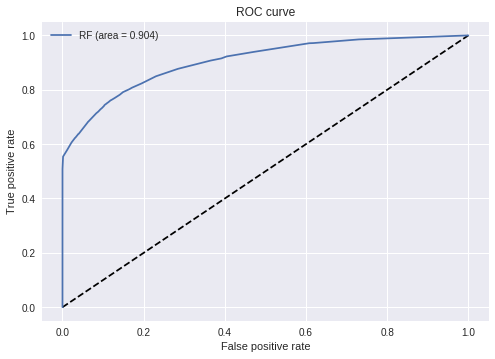

In [0]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Plot Learning Curve 

Plot the learning curve to show if the model is over fitting or under fitting on our training set

* The learning curve of the training score is compared to the learning curve of the cross validation score on a fold of 5 
* The evaluation metric used here was roc-auc which is better metric that accuracy for this case study.

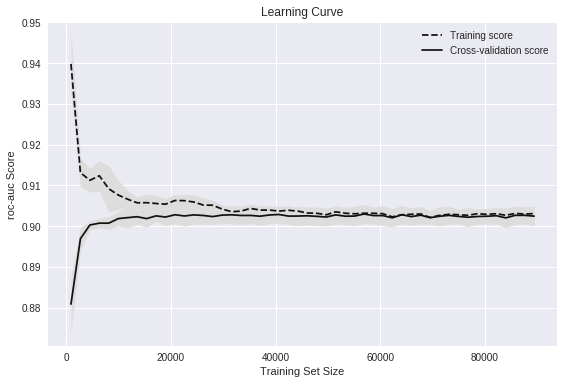

In [0]:
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='roc_auc',
                                                        # Use all computer cores
                                                        n_jobs=1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("roc-auc Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


From the above learning curve
* It shows that the training data is not over fitting or under fitting on our training data
* At data point 0 the learning curve started on a high roc- auc score and dropped to below 91%  where it moves along the x-axis on a single accuracy of 90%.
* For the cv score we can see that at data point 0 the model started with a low accuracy but moved upwards towards the 90% and moves slightly upwards from there till it converges with the training roc-auc score.
* We can note here that both the training score and validation score converges at a little above 90% which is a good auc-roc score.
* Th roc-auc score gotten depicts that the model is a good one beating the average threshold of 56%